In [1]:
# Stanford Convolution
# https://cs231n.github.io/convolutional-networks/#conv

# try naive convolution
# https://www.youtube.com/watch?v=-Y4ST8eNySI

# try TF im2col convolution
# https://stackoverflow.com/questions/45553929/implementing-im2col-in-tensorflow

# integrate im2col with matmul

# integrate im2col with matmul + errors

# https://scocoyash.github.io/speeding-up-convolutions/

In [2]:
%matplotlib inline

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [10]:
img = x_train[1]
img.shape

(32, 32, 3)

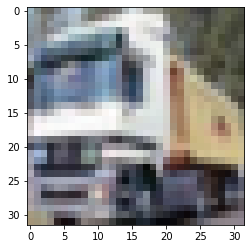

In [11]:
plt.imshow(img)

In [12]:
img = tf.expand_dims(img,0)
img.shape

TensorShape([1, 32, 32, 3])

In [13]:
patches = tf.image.extract_patches(images=img,
                                   sizes=[1, 16, 16, 1],
                                   strides=[1, 16, 16, 1],
                                   rates=[1, 1, 1, 1],
                                   padding='VALID')

In [16]:
patches.shape

TensorShape([1, 2, 2, 768])

(2, 2, 768)


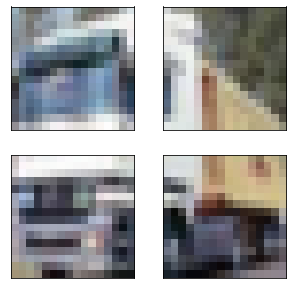

In [21]:
plt.figure(figsize=(5, 5))
for imgs in patches:
    print(imgs.shape)
    count = 0
    for r in range(2):
        for c in range(2):
            ax = plt.subplot(2, 2, count+1)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(tf.reshape(imgs[r,c],shape=(16,16,3)))
            count += 1

In [38]:
q1patch = patches[0,0,0,:]
q1patch.get_shape()

TensorShape([768])

In [40]:
q1patch = tf.reshape(q1patch, shape=(16,16,3))

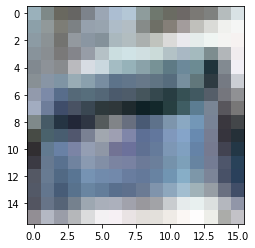

In [42]:
plt.imshow(q1patch)

In [43]:
q1patchtr = tf.transpose(q1patch, (2,0,1))

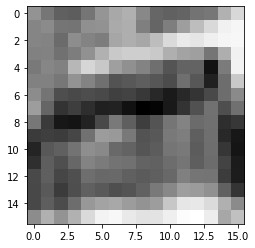

In [51]:
plt.imshow(q1patchtr[0], cmap="gray")

In [52]:
tf.reduce_sum(q1patchtr[0]-q1[:,:,0])

<tf.Tensor: shape=(), dtype=uint8, numpy=0>

In [54]:
tf.reduce_sum(q1patchtr[1]-q1[:,:,1])

<tf.Tensor: shape=(), dtype=uint8, numpy=0>

In [55]:
tf.reduce_sum(q1patchtr[2]-q1[:,:,2])

<tf.Tensor: shape=(), dtype=uint8, numpy=0>

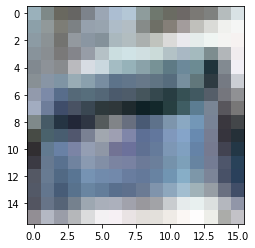

In [29]:
q1 = tf.reshape(patches[0,0,0,:],shape=(16,16,3)) 
plt.imshow(q1)

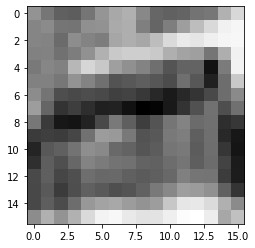

In [33]:
# red channel
plt.imshow(q1[:,:,0], cmap="gray")

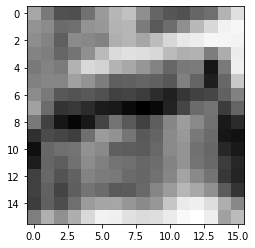

In [34]:
# green channel
plt.imshow(q1[:,:,1], cmap="gray")

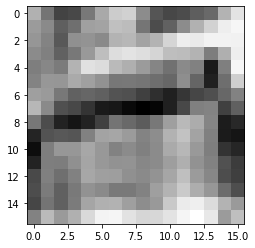

In [35]:
# blue channel
plt.imshow(q1[:,:,2], cmap="gray")